## 딥러닝

### 심층신경망

In [19]:
# 모듈 로드
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [20]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

- 이미 이전장에서 다운로드 했기 때문에 다시 다운로드 하지 않음

In [21]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
train_input = train_input.reshape(-1, 28*28)
test_input = test_input.reshape(-1, 28*28)

In [23]:
# 스케일링
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input.astype(np.float64))
test_scaled = scaler.transform(test_input.astype(np.float64))

In [24]:
# 훈련세트, 검증세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2
)

In [26]:
print(train_scaled.shape, val_scaled.shape, test_scaled.shape)
print(train_target.shape, val_target.shape, test_target.shape)

(48000, 784) (12000, 784) (10000, 784)
(48000,) (12000,) (10000,)


##### 심층신경망 만들기

In [31]:
# 밀집층 생성
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape = (784, ), name = 'hidden')
dense2 = keras.layers.Dense(10, activation='softmax', name='output')

In [32]:
# 신경망 모델 생성
model = keras.Sequential([dense1, dense2])

In [33]:
# 모델 요약
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 심층신경망 만들기2

In [39]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape = (784, ), name = 'hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name = 'Fashion_MNIST_Model')

In [40]:
model.summary()

Model: "Fashion_MNIST_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
# 모델 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [45]:
model.fit(train_scaled, train_target, epochs=100)

Epoch 1/100


1500/1500 [==============================] - 2s 918us/step - loss: 0.4677 - accuracy: 0.8367
Epoch 2/100
1500/1500 [==============================] - 1s 885us/step - loss: 0.3525 - accuracy: 0.8717
Epoch 3/100
1500/1500 [==============================] - 1s 869us/step - loss: 0.3170 - accuracy: 0.8855
Epoch 4/100
1500/1500 [==============================] - 1s 884us/step - loss: 0.2922 - accuracy: 0.8958
Epoch 5/100
1500/1500 [==============================] - 1s 873us/step - loss: 0.2725 - accuracy: 0.9023
Epoch 6/100
1500/1500 [==============================] - 1s 859us/step - loss: 0.2562 - accuracy: 0.9087
Epoch 7/100
1500/1500 [==============================] - 1s 854us/step - loss: 0.2421 - accuracy: 0.9145
Epoch 8/100
1500/1500 [==============================] - 1s 856us/step - loss: 0.2282 - accuracy: 0.9189
Epoch 9/100
1500/1500 [==============================] - 1s 846us/step - loss: 0.2168 - accuracy: 0.9225
Epoch 10/100
1500/1500 [=============================

In [ ]:
model.evaluate(val_scaled, val_target)
# 검증 정확도 : 87.8%

375/375 [==============================] - 0s 716us/step - loss: 0.8836 - accuracy: 0.8737


[0.8836357593536377, 0.8736666440963745]

In [48]:
pred_result = model.predict(test_scaled)

313/313 [==============================] - 0s 683us/step


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [50]:
# 한글로 Matplotlib 사용시 항상 필요
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

In [55]:
class_names = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [56]:
# 테스트이미지와 예측결과 시각화
def show_image(index):
    plt.figure(figsize=(2,2))
    plt.imshow(test_input[index].reshape(28, 28), cmap='gray_r')
    true_label = class_names[test_target[index]]
    pred_label = class_names[np.argmax(pred_result[index])]
    plt.title(f'실제: {true_label}, 예측: {pred_label}')
    plt.axis('off')
    plt.show()

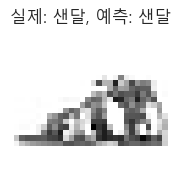

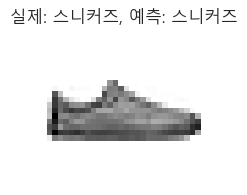

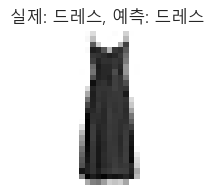

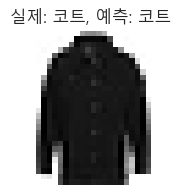

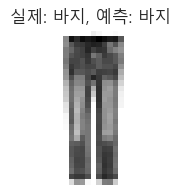

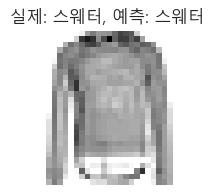

In [57]:
for i in range(11,17):
    show_image(i)

#### 렐루 함수

- 인공신경망 은닉층에 초기에는 Sigmoid 함수 사용
    - 단점 : 오른쪽, 왼쪽 끝으로 갈수록 그래프가 누워있어서 올바를 출력을 못만듬

- 렐루함수(ReLU) : 수정된 선형유닛 뜻의 함수     

    <img src = "../image/ml1011.png" width = "500">

#### Flatten 객체
- 이미지 2차원배열을 1차원으로 변경할 때 np.reshape() 사용
- Flatten 클래스가 위의 일을 대신해줌

In [58]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28), name = 'Flatten'),
    keras.layers.Dense(100, activation='relu', name = 'hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [59]:
model2.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [62]:
train_scaled = train_input / 255.0
test_scaled = test_input / 255.0

In [63]:
# 훈련세트, 검증세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [64]:
# 모델 설정
model2.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [65]:
# 모델 훈련
model2.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 893us/step - loss: 0.5356 - accuracy: 0.8121
Epoch 2/20
1500/1500 [==============================] - 1s 912us/step - loss: 0.3933 - accuracy: 0.8584
Epoch 3/20
1500/1500 [==============================] - 1s 906us/step - loss: 0.3532 - accuracy: 0.8719
Epoch 4/20
1500/1500 [==============================] - 1s 894us/step - loss: 0.3323 - accuracy: 0.8802
Epoch 5/20
1500/1500 [==============================] - 1s 927us/step - loss: 0.3178 - accuracy: 0.8869
Epoch 6/20
1500/1500 [==============================] - 1s 920us/step - loss: 0.3057 - accuracy: 0.8904
Epoch 7/20
1500/1500 [==============================] - 1s 911us/step - loss: 0.2920 - accuracy: 0.8963
Epoch 8/20
1500/1500 [==============================] - 1s 908us/step - loss: 0.2859 - accuracy: 0.8979
Epoch 9/20
1500/1500 [==============================] - 1s 896us/step - loss: 0.2787 - accuracy: 0.9008
Epoch 10/20
1500/1500 [==============================] - 1s 916u

In [ ]:
model2.evaluate(val_scaled, val_target)
# ReLU 함수 사용시, Sigmoid 함수 사용시 0.01% 개선

375/375 [==============================] - 0s 771us/step - loss: 0.4737 - accuracy: 0.8744


[0.47366559505462646, 0.8744166493415833]

#### 옵티마이저
- 하이퍼파라미터 값 최적화

In [67]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28), name = 'Flatten'),
    keras.layers.Dense(100, activation='relu', name = 'hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [72]:
# 모델3 설정, 최적화는 adam클래스만 사용할 것
model3.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [75]:
# 모델 훈련. 모델훈련은 정보를 저장하기 때문에 다시 수행하면 정확도가 높아진다.
model3.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 1s 895us/step - loss: 0.1823 - accuracy: 0.9321
Epoch 2/20
1500/1500 [==============================] - 1s 920us/step - loss: 0.1760 - accuracy: 0.9348
Epoch 3/20
1500/1500 [==============================] - 1s 900us/step - loss: 0.1719 - accuracy: 0.9352
Epoch 4/20
1500/1500 [==============================] - 1s 891us/step - loss: 0.1660 - accuracy: 0.9386
Epoch 5/20
1500/1500 [==============================] - 1s 889us/step - loss: 0.1656 - accuracy: 0.9379
Epoch 6/20
1500/1500 [==============================] - 1s 904us/step - loss: 0.1601 - accuracy: 0.9397
Epoch 7/20
1500/1500 [==============================] - 1s 894us/step - loss: 0.1575 - accuracy: 0.9409
Epoch 8/20
1500/1500 [==============================] - 1s 909us/step - loss: 0.1547 - accuracy: 0.9419
Epoch 9/20
1500/1500 [==============================] - 1s 927us/step - loss: 0.1482 - accuracy: 0.9433
Epoch 10/20
1500/1500 [==============================] - 1s 950u

- optimizer 사용시 0.01정도 개선

In [ ]:
model3.evaluate(val_scaled, val_target)
# 훈련 95%, 검증 88% - 7정도 차이

375/375 [==============================] - 0s 718us/step - loss: 0.4075 - accuracy: 0.8929


[0.40753912925720215, 0.8929166793823242]

#### 드롭아웃
- 훈련과정 밀집층에 일부 뉴런을 꺼버림.

In [77]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28), name = 'Flatten'),
    keras.layers.Dense(100, activation='relu', name = 'hidden'),
    keras.layers.Dropout(0.3, name = 'dropout'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [78]:
model4.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
model4.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [ ]:
# 모델 훈련. 모델훈련은 정보를 저장하기 때문에 다시 수행하면 이전 정보를 담고 시작
model4.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 958us/step - loss: 0.5927 - accuracy: 0.7904
Epoch 2/20
1500/1500 [==============================] - 1s 954us/step - loss: 0.4364 - accuracy: 0.8432
Epoch 3/20
1500/1500 [==============================] - 1s 942us/step - loss: 0.4045 - accuracy: 0.8509
Epoch 4/20
1500/1500 [==============================] - 1s 920us/step - loss: 0.3794 - accuracy: 0.8614
Epoch 5/20
1500/1500 [==============================] - 1s 933us/step - loss: 0.3653 - accuracy: 0.8667
Epoch 6/20
1500/1500 [==============================] - 1s 945us/step - loss: 0.3548 - accuracy: 0.8691
Epoch 7/20
1500/1500 [==============================] - 1s 936us/step - loss: 0.3454 - accuracy: 0.8724
Epoch 8/20
1500/1500 [==============================] - 1s 967us/step - loss: 0.3326 - accuracy: 0.8782
Epoch 9/20
1500/1500 [==============================] - 1s 969us/step - loss: 0.3283 - accuracy: 0.8781
Epoch 10/20
1500/1500 [==============================] - 1s 965u

In [ ]:
model4.evaluate(val_scaled, val_target)
# 훈련 89%, 검증 88% - 1차이(훈련과 검증사이의 차이가 거의 없음)

375/375 [==============================] - 0s 714us/step - loss: 0.3225 - accuracy: 0.8885


[0.32253116369247437, 0.8884999752044678]

- 드롭아웃하면 정확도가 떨어짐 > 훈련과 검증(테스트)사이에 정확도 차이가 줄어듦
- `과대적합`(훈련세트 훈련에 너무 치중하여서 정확도가 너무 높은 것) 방지

#### 모델의 저장과 복원
- 훈련시간이 딥러닝에 크게 좌우됨. 저장이 없으면 다시 훈련시키고 시간을 소요해야 함.
- 파일로 저장 후 모델에 대한 구조와 파라미터 만 저장하는 두가지 방법이 존재

In [82]:
# 모델4 저장 - 파라미터만 저장
model4.save_weights('./model4-weights.h5')

In [83]:
# 모델4 저장 - 전체(모델 구조와 파라미터) 저장
model4.save('./model4-whole.h5')

c:\Source\iot-dataanalysis-2025\mlvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##### 모델 사용
- 파라미터만 저장한 파일을 사용하려면, 먼저 모델을 생성해야 함

In [85]:
model5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28), name = 'Flatten5'),
    keras.layers.Dense(100, activation='relu', name = 'hidden5'),
    keras.layers.Dropout(0.3, name = 'dropout5'),
    keras.layers.Dense(10, activation='softmax', name='output5')
], name='Fashion_MNIST_RELU5')

In [86]:
model5.load_weights('./model4-weights.h5')

In [88]:
pred_result = model5.predict(test_scaled)

313/313 [==============================] - 0s 663us/step


- 모델까지 전부 생성해주는 방법

In [90]:
model6 = keras.models.load_model('./model4-whole.h5')

In [91]:
model6.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [92]:
model6.evaluate(test_scaled, test_target)

313/313 [==============================] - 0s 805us/step - loss: 0.3561 - accuracy: 0.8803


[0.35614457726478577, 0.880299985408783]

#### 콜백
- 실행도중 다른 일을 할 수 있도록 해주는 기능
- `조기종료`를 위해서 사용

In [93]:
model7 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28), name = 'Flatten7'),
    keras.layers.Dense(100, activation='relu', name = 'hidden7'),
    keras.layers.Dropout(0.3, name = 'dropout7'),
    keras.layers.Dense(10, activation='softmax', name='output7')
], name='Fashion_MNIST_RELU7')

In [94]:
model7.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [95]:
# 에포크마다 모델 저장기능 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best-model.h5', save_best_only=True) # 최고 상태면 저장
# 조기종료 콜백
## 두번이상 훈련값이 동일하면 조기종료. 이전 최고상태로 복구
early_stop_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True) 

In [96]:
# 모델 훈련. 모델훈련은 정보를 저장하기 때문에 다시 수행하면 이전 정보를 담고 시작
model7.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),
           callbacks = [checkpoint_cb, early_stop_cb])

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5900 - accuracy: 0.7930 - val_loss: 0.4352 - val_accuracy: 0.8440
Epoch 2/20
 136/1500 [=>............................] - ETA: 1s - loss: 0.4350 - accuracy: 0.8431

c:\Source\iot-dataanalysis-2025\mlvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 2s 1ms/step - loss: 0.4381 - accuracy: 0.8435 - val_loss: 0.3880 - val_accuracy: 0.8590
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4020 - accuracy: 0.8544 - val_loss: 0.3794 - val_accuracy: 0.8616
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3803 - accuracy: 0.8619 - val_loss: 0.3562 - val_accuracy: 0.8707
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3603 - accuracy: 0.8676 - val_loss: 0.3654 - val_accuracy: 0.8662
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3503 - accuracy: 0.8726 - val_loss: 0.3408 - val_accuracy: 0.8757
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3430 - accuracy: 0.8739 - val_loss: 0.3356 - val_accuracy: 0.8775
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3340 - accuracy: 0.8777 - val_loss: 0.3294 - val_accuracy: 0.8799
Epo

In [97]:
model7.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 750us/step - loss: 0.3204 - accuracy: 0.8859


[0.32036495208740234, 0.8859166502952576]

In [98]:
early_stop_cb.stopped_epoch

11

- 20번 중 15번 반복에서 조기종료

#### 결론
- `심층 신경망` : 2개 이상의 밀집층을 포함한 신경망 모델. 다층 신경망 모델, 다층 인공신경망
- `렐루 함수` : 시그모이드 함수의 단점을 보완한 활성화 함수
- `옵티마이저` : 신경망의 가중치(기울기)와 절편을 학습하기 위한 알고리즘 또는 방법. Adam, SGD(확률적 경사하강법), RMSprop...

- `드롭아웃` : 밀집층의 뉴런을 임의로 꺼서 훈련을 덜 시키는 것. 과대적합을 막기 위해서 수행
- 모델 저장과 복원 : 이미 훈련된 데이터를 저장했다가 나중에 다시 쓰기 위해서
- `콜백` : 에포크마다 모델 저장 또는 조기종료를 위해서 훈련 도중에 다른 기능을 수행하는 것